In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../../..')
from omama import gp2
from omama.gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(classifier='kattunet2d',
           filter_num=[16, 32, 64, 128, 256],
           stack_num_down=2,
           stack_num_up=2,
           activation='ReLU',
           atten_activation='ReLU',
           attention='add',
           output_activation='Sigmoid',
           batch_norm=False,
           pool=False,
           unpool=False,
           weights='imagenet',
           optimizer= None, #None = default is optimizers.Adam(learning_rate=1e-3)
           loss=None, #None = default is losses.binary_crossentropy
           metric=None # None = default is Util.dice_coef
          )

*** GP2 KATTUnet2D ***
Working directory: /tmp/tmpt4e69y9dGP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images_final_unn.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks_final_unn.npy')

In [5]:
images.shape

(11298, 512, 512, 1)

In [6]:
masks.shape

(11298, 512, 512, 1)

In [7]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [8]:
R.run(images=images, masks=masks, weights=weights, runs=8)

Weights OK!
******
Loop 1
Epoch 1/100
9/9 [==============================] - 29s 2s/step - loss: 0.2568 - dice_coeff: 0.1093 - val_loss: 0.2902 - val_dice_coeff: 0.1292
Epoch 2/100
9/9 [==============================] - 8s 962ms/step - loss: 0.2231 - dice_coeff: 0.0969 - val_loss: 0.2741 - val_dice_coeff: 0.1201
Epoch 3/100
9/9 [==============================] - 8s 963ms/step - loss: 0.2122 - dice_coeff: 0.1015 - val_loss: 0.2600 - val_dice_coeff: 0.1347
Epoch 4/100
9/9 [==============================] - 8s 956ms/step - loss: 0.2042 - dice_coeff: 0.1132 - val_loss: 0.2549 - val_dice_coeff: 0.1381
Epoch 5/100
9/9 [==============================] - 8s 997ms/step - loss: 0.1991 - dice_coeff: 0.1189 - val_loss: 0.2497 - val_dice_coeff: 0.1414
Epoch 6/100
9/9 [==============================] - 8s 970ms/step - loss: 0.1947 - dice_coeff: 0.1238 - val_loss: 0.2432 - val_dice_coeff: 0.1485
Epoch 7/100
9/9 [==============================] - 8s 977ms/step - loss: 0.1915 - dice_coeff: 0.1287 - val

19/19 [==============================] - 13s 702ms/step - loss: 0.0664 - dice_coeff: 0.6673 - val_loss: 0.1486 - val_dice_coeff: 0.5947
Epoch 14/100
19/19 [==============================] - 13s 690ms/step - loss: 0.0642 - dice_coeff: 0.6813 - val_loss: 0.1866 - val_dice_coeff: 0.5480
Epoch 15/100
19/19 [==============================] - 13s 698ms/step - loss: 0.0643 - dice_coeff: 0.6791 - val_loss: 0.1565 - val_dice_coeff: 0.5988
Epoch 16/100
19/19 [==============================] - 13s 697ms/step - loss: 0.0655 - dice_coeff: 0.6761 - val_loss: 0.1407 - val_dice_coeff: 0.5973
Model saved to: /tmp/tmpt4e69y9dGP2/attunet_6attunet_model
History saved to: /tmp/tmpt4e69y9dGP2/attunet_history_6.pkl
Testing the classifier...
Testing the discriminator...
22/22 [==============================] - 1s 58ms/step - loss: 2.7377 - accuracy: 0.9350
Replacing 102 from 307 !
D_relabeled_ 102
point ids 102
Removed: 102 Filled: 102
TOOK 327.7331964969635 seconds
==== DONE LOOP 7 ====
******
Loop 8
Epoch 1

In [9]:
R.classifier_scores

[[0.18992279469966888, 0.25495755672454834],
 [0.18500176072120667, 0.2769104838371277],
 [0.1287761628627777, 0.4494818449020386],
 [0.12320691347122192, 0.4627113342285156],
 [0.11357276886701584, 0.51361083984375],
 [0.11097171157598495, 0.5087186694145203],
 [0.10533429682254791, 0.5380011200904846],
 [0.10586469620466232, 0.5308372378349304]]

In [10]:
R.discriminator_scores

[[0.025649605318903923, 0.9940915703773499],
 [0.02806372568011284, 0.9911373853683472],
 [0.7486496567726135, 0.9807976484298706],
 [1.0744441747665405, 0.970457911491394],
 [2.5550074577331543, 0.9394387006759644],
 [3.416522741317749, 0.9246676564216614],
 [2.7376868724823, 0.9350073933601379],
 [5.912562370300293, 0.9113737344741821]]

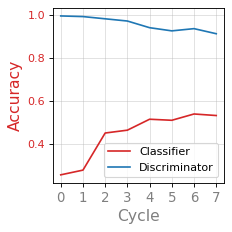

In [11]:
R.plot()